### Perceptron:
- It is a single layer Neural Network.
- It acts like linear regression, Binary Classification.
- Loss Function: Binary Cross Entropy.
- Optimization: Gradient Descent/Stochastic Gradient descent.
### Learning Goals
- How to implement Preceptron?
- Understanding Vectorization.
- Writing code efficiently.
- Without using loop.
- What is meaning of linear classifier.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Generating some data

In [71]:
x, y = make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or ndarray of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers mus

In [72]:
X, Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=10)

In [73]:
X.shape , Y.shape

((500, 2), (500,))

In [74]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

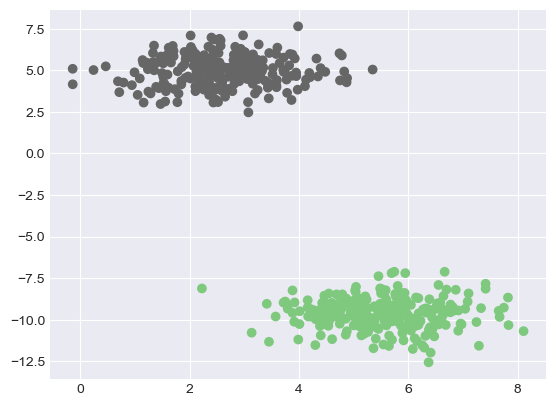

In [75]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.scatter(X[:,0], X[:,1], c= Y, cmap= plt.cm.Accent)
plt.show()

- ##### We need find a line to using perceptron to generate a seperating hyperplane,It is a binary class classification

In [76]:
### Model for Perceptron:

def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [77]:
sigmoid(5)


0.9933071490757153

In [78]:
z = np.array([1,2,3,4,5,0]) # broadcasting
# In list it not possible 
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715,
       0.5       ])

### Implement Perceptron Mearning Algorithm:
- Learn the weights
- Reduce loss
- Make the Prediction

In [79]:
# weights = [w0...wn], already transposed
def predict(X, weights): 
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions 
   
def loss(X, Y, weights):
    """Binary Cross Entropy"""
    Y_ = predict(X, weights)
    loss = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1- Y_))
    print(loss)
    return loss


def update(X, Y, weights, learning_rate):
    """perform weight updates for 1 epoch"""
    Y_ = predict(X, weights)#Y_ here will be the probability and Y will be
    # zero or one.
    delta_w = np.dot(X.T, (Y_-Y))
    m = X.shape[0]
    weights = weights - learning_rate*delta_w/(float(m))
    return weights
    
def train(X, Y, learning_rate = 0.5, maxEpochs = 100):
    # Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    # Initiate Weights as 0
    weights = np.zeros(X.shape[1])# n+1 entries, w0 =1

    # Iterate over all epochs and make updates
    loss_list = [] 
    for epoch in range(maxEpochs):
        weights = update(X, Y,weights, learning_rate)
        #print the progress
        l = loss(X, Y, weights)
        loss_list.append(l)
        
    return weights, loss_list[-1]
      

In [80]:
weights , final_loss =train(X, Y)
weights , final_loss

0.0005716427275807599
0.0005680886702568638
0.0005645798965066675
0.0005611155374084475
0.0005576947462450885
0.0005543166977970913
0.0005509805876624936
0.0005476856316025303
0.0005444310649117805
0.0005412161418119528
0.0005380401348680294
0.0005349023344260411
0.0005318020480713613
0.000528738600106766
0.0005257113310493706
0.0005227195971456637
0.0005197627699038659
0.0005168402356429495
0.0005139513950575079
0.0005110956627980362
0.0005082724670657031
0.0005054812492213339
0.000502721463407799
0.0004999925761853687
0.0004972940661795716
0.0004946254237408594
0.0004919861506159084
0.0004893757596298231
0.0004867937743789952
0.00048423972893412175
0.00048171316755303014
0.00047921364440289284
0.00047674072329157455
0.00047429397740754653
0.00047187298906837833
0.00046947734947715256
0.0004671066584866892
0.0004647605243712975
0.00046243856360569686
0.00046014040065085597
0.0004578656677465855
0.00045561400471050495
0.0004533850587433045
0.00045117848423990175
0.00044899394260644924


(array([ 0.02204952, -0.30768518,  1.90003958]), 0.00035514476140660806)

### Perceptron Implementation - Part 2:
- Make Predictions for all the data points
- Visualise Decision Surface
- Linear vs Non- Linear Classification

### Writing a predict Function
- Help to generate predictions for all the data points.
- Previously we trained our training data and check minimizes its loss.
- Now we are working on test data.

In [81]:
def getprediction(X_Test, weights, labels = True):
    if X_Test.shape[1] != weights.shape[0]:
         
        #our x data should columns of 1 appended.
        # weights starts from w0, so we need to confirm that 
        # x have 1's in its first column or not.

        
        ones = np.ones((X_Test.shape[0], 1))
        X_Test = np.hstack((ones,X_Test))
     #because of the sigmoid fuction 
     #we are getting the prob of prediction from predict func   
        probs = predict(X_Test, weights) 
    # Here we have to create a predict Y label , why?
    # because here we are looking at testing data , we have to create a 
    # a array for predicted values,
    # If would have unsupervised learning , we would have created a 
    # an array for training data too.
    if not labels :
        return probs
    else:
        labels = np.zeros(probs.shape) 
        
        labels[probs >= 0.5] = 1 # label as 1 , else all will be zero
        return labels
    

In [82]:
weights, weights[0], weights[1], weights[2]

(array([ 0.02204952, -0.30768518,  1.90003958]),
 0.022049521861422276,
 -0.30768517793993233,
 1.9000395764025664)

### Example:


In [83]:
x1 = np.linspace(-10, 10, 10)
print(x1)
x2 = -(weights[0]+ weights[1]*x1)/(weights[2])
print(x2)

[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]
[-1.63096671 -1.2711085  -0.91125029 -0.55139208 -0.19153387  0.16832433
  0.52818254  0.88804075  1.24789896  1.60775717]


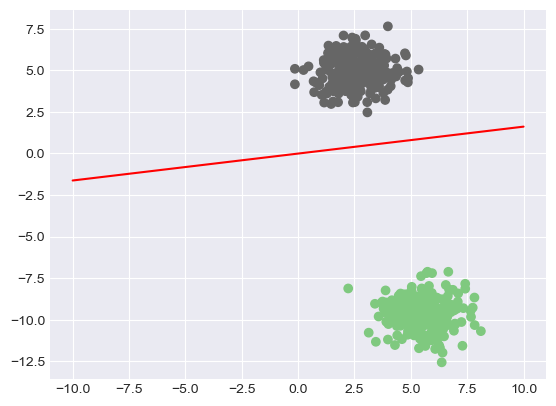

In [84]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.scatter(X[:,0], X[:,1], c = Y, cmap= plt.cm.Accent)
plt.plot(x1, x2, c= "red")
plt.show()

### Find The  Training Accuracy:

In [85]:
Y_ = getprediction(X, weights, labels = True)
print(Y_[0: 10])
print(Y_[:10] == Y[:10])
training_accuracy = (np.sum(Y_==Y))/(Y.shape[0]*100)
print(training_accuracy)

[0. 0. 1. 1. 1. 1. 0. 0. 1. 1.]
[ True  True  True  True  True  True  True  True  True  True]
0.01


### Perceptron for non linear data:

In [86]:
from sklearn.datasets import make_moons

In [87]:
X, Y = make_moons(n_samples=1000, shuffle= True, noise = 0.1, random_state= 2)

In [88]:
make_moons?

Signature: make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)
Docstring:
Make two interleaving half circles.

A simple toy dataset to visualize clustering and classification
algorithms. Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or tuple of shape (2,), dtype=int, default=100
    If int, the total number of points generated.
    If two-element tuple, number of points in each of two moons.

    .. versionchanged:: 0.23
       Added two-element tuple.

shuffle : bool, default=True
    Whether to shuffle the samples.

noise : float, default=None
    Standard deviation of Gaussian noise added to the data.

random_state : int, RandomState instance or None, default=None
    Determines random number generation for dataset shuffling and noise.
    Pass an int for reproducible output across multiple function calls.
    See :term:`Glossary <random_state>`.

Returns
-------
X : ndarray of shape (n_samples, 2)
    The genera

In [89]:
X.shape, Y.shape

((1000, 2), (1000,))

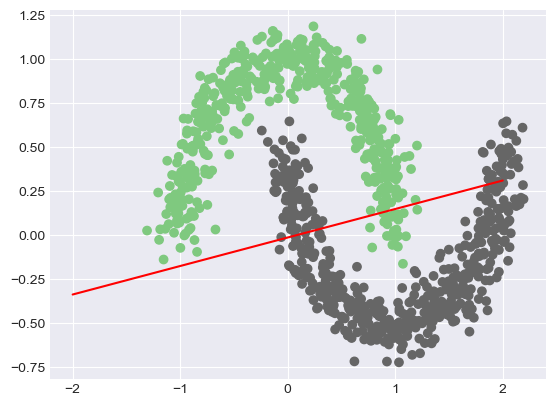

In [92]:
x1 = np.linspace(-2, 2, 10)

x2 = -(weights[0]+ weights[1]*x1)/(weights[2])
plt.style.use("seaborn-v0_8-darkgrid")
plt.scatter(X[:,0], X[:,1], c = Y, cmap = plt.cm.Accent)
plt.plot(x1, x2, c= "red")
plt.show()





# Multi Layer Perceptron: